# Implementation of KMeans Clustering Pre-Classification

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import additional dependencies
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ignore Python warnings about past model versions
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import additional dependencies
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Determining Optimal Number of Clusters

In [3]:
# Import datasets
X_train = pd.read_csv("data/X_train.csv", index_col = 0)
X_test = pd.read_csv("data/X_test.csv", index_col = 0)
y_train = pd.read_csv("data/y_train.csv", index_col = 0)
y_test = pd.read_csv("data/y_test.csv", index_col = 0)

# Import PCA datasets
X_train_pca = pd.read_csv("data/X_train_pca.csv", index_col = 0)
X_test_pca = pd.read_csv("data/X_test_pca.csv", index_col = 0)

In [4]:
# Define a range of clusters
cluster_range = list(range(2,8))

# List to store silhouette scores within-cluster sum of square (WCSS) distance
silhouette_scores = []
wcss = []

# For loop to go through range of optimal clusters
for i in cluster_range:
    kmeans = KMeans(n_clusters = i)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    # Append to silhouette scores list
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    # Append to WCSS list
    wcss.append(kmeans.inertia_)
    # Display average silhouette scores
    print(f"For {i} clusters, the average silhouette score is: {silhouette_avg:.5f}")

For 2 clusters, the average silhouette score is: 0.27738
For 3 clusters, the average silhouette score is: 0.22690
For 4 clusters, the average silhouette score is: 0.21270
For 5 clusters, the average silhouette score is: 0.15836
For 6 clusters, the average silhouette score is: 0.15545
For 7 clusters, the average silhouette score is: 0.14802


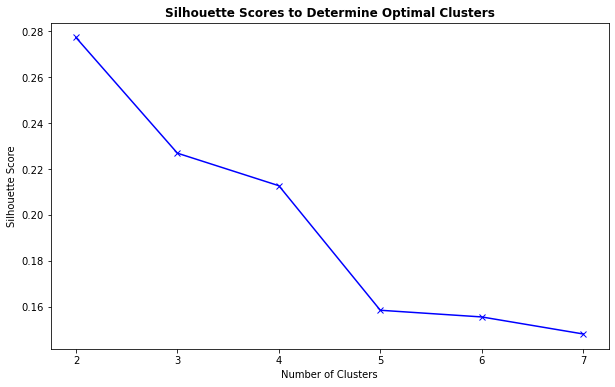

In [5]:
# Plot the silhouette scores
plt.figure(figsize = (10,6))
plt.plot(cluster_range, silhouette_scores, "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores to Determine Optimal Clusters", fontweight = "bold")
plt.show();

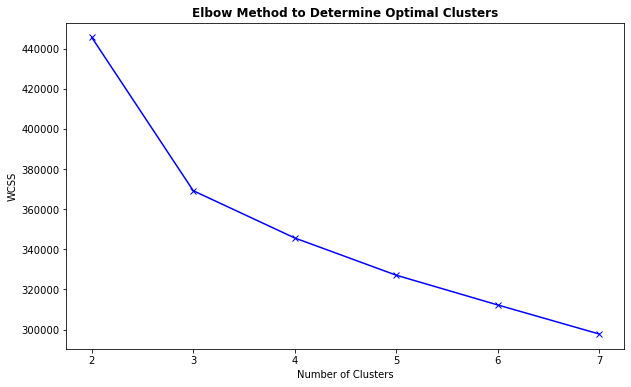

In [6]:
# Plot the WCSS for Elbow Method
plt.figure(figsize = (10,6))
plt.plot(cluster_range, wcss, "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal Clusters", fontweight = "bold")
plt.show();

Based on both the silhouette score and elbow method, the **optimal number of clusters** would be **4**.

# Building and Fitting KMeans Model to the Data

In [7]:
# Convert the PCA datasets into NumPy arrays for slicing within KMeans plotting
X_train_pca_array = X_train_pca.values

In [8]:
# Define the KMeans model
kmeans = KMeans(n_clusters = 4)

# Fit KMeans to the transformed data
train_clusters = kmeans.fit_predict(X_train_pca)

# Create a new cluster training feature dataset
X_train_cluster = X_train

# Add labels for clusters as a feature to original training data
X_train_cluster["cluster"] = train_clusters

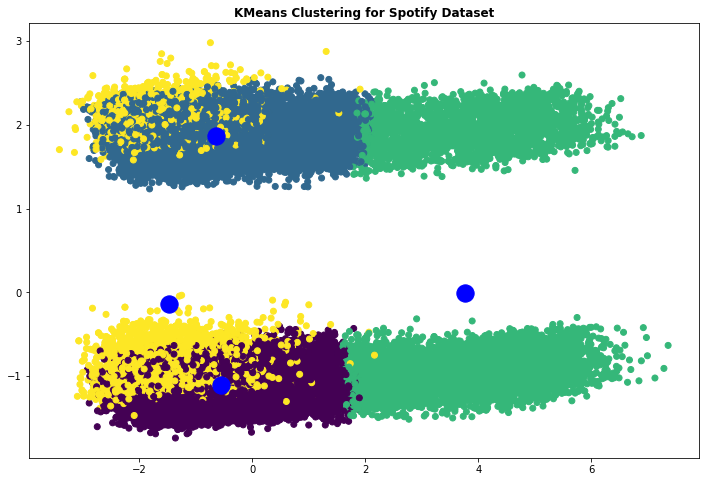

In [9]:
# Display the actual clusters
plt.figure(figsize = (12,8))
plt.scatter(X_train_pca_array[:, 0], X_train_pca_array[:, 1], 
            c = train_clusters, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 300, c = "blue")
plt.title("KMeans Clustering for Spotify Dataset", fontweight = "bold")
plt.show();

In [10]:
# Apply the Kmeans to the test dataset
test_cluster = kmeans.fit_predict(X_test_pca)

# Add cluster labels to the test dataset
X_test_cluster = X_test
X_test_cluster["cluster"] = test_cluster

# Export both clustered datasets
X_train_cluster.to_csv("data/X_train_cluster.csv")
X_test_cluster.to_csv("data/X_test_cluster.csv")